In [4]:
import requests 
import pandas as pd
import numpy as np

In [5]:
url = 'https://fantasy.premierleague.com/api/bootstrap-static/'

In [6]:
r = requests.get(url)

In [7]:
json = r.json()

In [8]:
json.keys()

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])

In [14]:
elements_df = pd.DataFrame(json['elements'])

In [12]:
elements_types_df = pd.DataFrame(json['element_types'])
teams_df = pd.DataFrame(json['teams'])

In [15]:
elements_df.head()

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,...,threat_rank,threat_rank_type,ict_index_rank,ict_index_rank_type,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,direct_freekicks_order,direct_freekicks_text,penalties_order,penalties_text
0,0.0,0.0,37605,0,0,-2,2,0,3,0.0,...,625,248,625,248,NaN,,NaN,,NaN,
1,0.0,0.0,39476,0,0,-2,2,0,2,0.0,...,566,212,586,215,NaN,,NaN,,NaN,
2,100.0,75.0,41270,0,0,-1,1,0,2,0.8,...,268,83,302,99,NaN,,4.0,,NaN,
3,100.0,100.0,54694,-1,1,-7,7,1,3,3.2,...,25,14,39,25,NaN,,NaN,,1.0,
4,100.0,100.0,58822,0,0,-4,4,0,2,0.7,...,547,207,574,212,NaN,,NaN,,NaN,


In [16]:
elements_df.columns

Index(['chance_of_playing_next_round', 'chance_of_playing_this_round', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'dreamteam_count', 'element_type', 'ep_next',
       'ep_this', 'event_points', 'first_name', 'form', 'id', 'in_dreamteam',
       'news', 'news_added', 'now_cost', 'photo', 'points_per_game',
       'second_name', 'selected_by_percent', 'special', 'squad_number',
       'status', 'team', 'team_code', 'total_points', 'transfers_in',
       'transfers_in_event', 'transfers_out', 'transfers_out_event',
       'value_form', 'value_season', 'web_name', 'minutes', 'goals_scored',
       'assists', 'clean_sheets', 'goals_conceded', 'own_goals',
       'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards',
       'saves', 'bonus', 'bps', 'influence', 'creativity', 'threat',
       'ict_index', 'influence_rank', 'influence_rank_type', 'creativity_rank',
       'creativity_rank_type', 'threat_rank'

In [17]:
slim_elements_df = elements_df[['second_name','team','element_type','selected_by_percent','now_cost','minutes','transfers_in','value_season','total_points']]

In [18]:
slim_elements_df.head()

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points
0,Özil,1,3,0.5,68,0,3426,0.0,0
1,Papastathopoulos,1,2,0.1,48,0,10261,0.0,0
2,Luiz Moreira Marinho,1,2,0.7,54,479,40205,1.7,9
3,Aubameyang,1,3,7.2,113,1346,514712,4.7,53
4,Soares,1,2,0.2,46,5,4116,0.2,1


In [26]:
slim_elements_df['position'] = slim_elements_df.element_type.map(elements_types_df.set_index('id').singular_name)

<ipython-input-26-d2f8756adc31>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slim_elements_df['position'] = slim_elements_df.element_type.map(elements_types_df.set_index('id').singular_name)


In [27]:
slim_elements_df.head()

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position
0,Özil,1.0,3.0,0.5,68.0,0.0,3426.0,0.0,0.0,Midfielder
1,Papastathopoulos,1.0,2.0,0.1,48.0,0.0,10261.0,0.0,0.0,Defender
2,Luiz Moreira Marinho,1.0,2.0,0.7,54.0,479.0,40205.0,1.7,9.0,Defender
3,Aubameyang,1.0,3.0,7.2,113.0,1346.0,514712.0,4.7,53.0,Midfielder
4,Soares,1.0,2.0,0.2,46.0,5.0,4116.0,0.2,1.0,Defender


In [28]:
slim_elements_df['team'] = slim_elements_df.team.map(teams_df.set_index('id').name)

<ipython-input-28-f3497c573517>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slim_elements_df['team'] = slim_elements_df.team.map(teams_df.set_index('id').name)


In [29]:
slim_elements_df.head()

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position
0,Özil,Arsenal,3.0,0.5,68.0,0.0,3426.0,0.0,0.0,Midfielder
1,Papastathopoulos,Arsenal,2.0,0.1,48.0,0.0,10261.0,0.0,0.0,Defender
2,Luiz Moreira Marinho,Arsenal,2.0,0.7,54.0,479.0,40205.0,1.7,9.0,Defender
3,Aubameyang,Arsenal,3.0,7.2,113.0,1346.0,514712.0,4.7,53.0,Midfielder
4,Soares,Arsenal,2.0,0.2,46.0,5.0,4116.0,0.2,1.0,Defender


In [30]:
slim_elements_df['value']= slim_elements_df.value_season.astype(float)

<ipython-input-30-00658bb1fd8d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slim_elements_df['value']= slim_elements_df.value_season.astype(float)


In [31]:
slim_elements_df['value']= slim_elements_df.value_season.astype(float)

<ipython-input-31-00658bb1fd8d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slim_elements_df['value']= slim_elements_df.value_season.astype(float)


In [32]:
slim_elements_df.sort_values('value',ascending = False).head(20)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
33,Martínez,Aston Villa,1.0,29.7,51.0,1350.0,2573599.0,16.3,83.0,Goalkeeper,16.3
485,Bednarek,Southampton,2.0,11.6,49.0,1440.0,1062117.0,16.1,79.0,Defender,16.1
286,Bamford,Leeds,4.0,42.9,66.0,1456.0,4703061.0,15.3,101.0,Forward,15.3
297,Meslier,Leeds,1.0,5.9,46.0,1530.0,622392.0,15.2,70.0,Goalkeeper,15.2
473,McCarthy,Southampton,1.0,19.1,47.0,1440.0,1107781.0,15.1,71.0,Goalkeeper,15.1
284,Dallas,Leeds,2.0,13.2,48.0,1520.0,1316270.0,14.8,71.0,Defender,14.8
582,Soucek,West Ham,3.0,11.4,52.0,1530.0,1186929.0,14.8,77.0,Midfielder,14.8
484,Walker-Peters,Southampton,2.0,12.9,48.0,1530.0,1026730.0,14.4,69.0,Defender,14.4
569,Cresswell,West Ham,2.0,12.5,54.0,1530.0,1424169.0,14.3,77.0,Defender,14.3
565,Fabianski,West Ham,1.0,3.7,51.0,1440.0,402174.0,13.9,71.0,Goalkeeper,13.9


In [34]:
slim_elements_df.pivot_table(index = 'position',values = 'value', aggfunc =np.mean).reset_index()

,position,value
0,Defender,3.984375
1,Forward,3.821250
2,Goalkeeper,3.309589
3,Midfielder,3.942339


In [37]:
pivot=slim_elements_df.pivot_table(index='position',values='value',aggfunc=np.mean).reset_index()
pivot.sort_values('value',ascending=False)

,position,value
0,Defender,3.984375
3,Midfielder,3.942339
1,Forward,3.821250
2,Goalkeeper,3.309589


In [38]:
slim_elements_df = slim_elements_df.loc[slim_elements_df.value > 0]

In [39]:
pivot = slim_elements_df.pivot_table(index = 'position', values = 'value',aggfunc=np.mean).reset_index()

In [41]:
pivot.sort_values('value',ascending = False)

,position,value
2,Goalkeeper,7.793548
0,Defender,5.344311
3,Midfielder,5.065803
1,Forward,4.930645


In [45]:
team_pivot = slim_elements_df.pivot_table(index='team',values='value',aggfunc=np.mean).reset_index()

In [46]:
team_pivot.sort_values('value',ascending=False)

,team,value
8,Leeds,7.794737
1,Aston Villa,7.636842
15,Southampton,7.036364
18,West Ham,6.631818
19,Wolves,5.814286
5,Crystal Palace,5.619048
16,Spurs,5.595455
3,Burnley,5.540000
4,Chelsea,5.512500
2,Brighton,5.173913


In [47]:
fwd_df = slim_elements_df.loc[slim_elements_df.position == 'Forwards']
mid_df = slim_elements_df.loc[slim_elements_df.position == 'Midfielder']
def_df = slim_elements_df.loc[slim_elements_df.position == 'Defender']
goal_df = slim_elements_df.loc[slim_elements_df.position == 'Goalkeeper']

<AxesSubplot:>

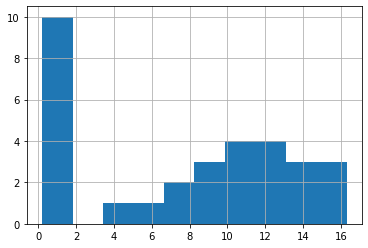

In [49]:
goal_df.value.hist()

In [50]:
goal_df.sort_values('value',ascending=False).head(20)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
33,Martínez,Aston Villa,1.0,29.7,51.0,1350.0,2573599.0,16.3,83.0,Goalkeeper,16.3
297,Meslier,Leeds,1.0,5.9,46.0,1530.0,622392.0,15.2,70.0,Goalkeeper,15.2
473,McCarthy,Southampton,1.0,19.1,47.0,1440.0,1107781.0,15.1,71.0,Goalkeeper,15.1
565,Fabianski,West Ham,1.0,3.7,51.0,1440.0,402174.0,13.9,71.0,Goalkeeper,13.9
112,Pope,Burnley,1.0,10.3,54.0,1260.0,363576.0,13.9,75.0,Goalkeeper,13.9
7,Leno,Arsenal,1.0,9.7,49.0,1530.0,598781.0,13.7,67.0,Goalkeeper,13.7
500,Lloris,Spurs,1.0,7.6,56.0,1440.0,498827.0,13.0,73.0,Goalkeeper,13.0
414,Darlow,Newcastle,1.0,4.5,50.0,1440.0,260238.0,12.2,61.0,Goalkeeper,12.2
543,Johnstone,West Brom,1.0,2.2,45.0,1530.0,256452.0,12.0,54.0,Goalkeeper,12.0
249,Schmeichel,Leicester,1.0,9.6,55.0,1530.0,374368.0,11.5,63.0,Goalkeeper,11.5


<AxesSubplot:>

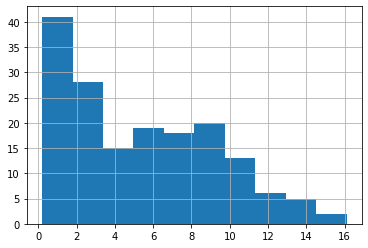

In [51]:
def_df.value.hist()

In [52]:
def_df.sort_values('value',ascending=False).head(20)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
485,Bednarek,Southampton,2.0,11.6,49.0,1440.0,1062117.0,16.1,79.0,Defender,16.1
284,Dallas,Leeds,2.0,13.2,48.0,1520.0,1316270.0,14.8,71.0,Defender,14.8
484,Walker-Peters,Southampton,2.0,12.9,48.0,1530.0,1026730.0,14.4,69.0,Defender,14.4
569,Cresswell,West Ham,2.0,12.5,54.0,1530.0,1424169.0,14.3,77.0,Defender,14.3
134,Zouma,Chelsea,2.0,20.8,58.0,1350.0,2355413.0,13.4,78.0,Defender,13.4
566,Ogbonna,West Ham,2.0,2.3,50.0,1502.0,247668.0,13.2,66.0,Defender,13.2
479,Vestergaard,Southampton,2.0,4.8,48.0,1125.0,1395625.0,13.1,63.0,Defender,13.1
48,Targett,Aston Villa,2.0,4.9,46.0,1350.0,530645.0,12.2,56.0,Defender,12.2
270,Justin,Leicester,2.0,22.0,50.0,1530.0,2131006.0,12.2,61.0,Defender,12.2
596,Saïss,Wolves,2.0,11.5,51.0,1057.0,2040630.0,12.2,62.0,Defender,12.2


In [53]:
mid_df.sort_values('value',ascending=False).head(20)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
582,Soucek,West Ham,3.0,11.4,52.0,1530.0,1186929.0,14.8,77.0,Midfielder,14.8
507,Son,Spurs,3.0,63.4,98.0,1346.0,5749746.0,13.5,132.0,Midfielder,13.5
608,Lomba Neto,Wolves,3.0,16.3,60.0,1351.0,1638592.0,13.3,80.0,Midfielder,13.3
480,Ward-Prowse,Southampton,3.0,12.5,62.0,1530.0,1907039.0,12.7,79.0,Midfielder,12.7
43,Grealish,Aston Villa,3.0,37.8,77.0,1350.0,4261041.0,12.6,97.0,Midfielder,12.6
287,Harrison,Leeds,3.0,2.4,54.0,1309.0,464791.0,12.4,67.0,Midfielder,12.4
171,Zaha,Crystal Palace,3.0,20.7,74.0,1340.0,3667995.0,12.0,89.0,Midfielder,12.0
282,Klich,Leeds,3.0,4.9,55.0,1401.0,1044833.0,12.0,66.0,Midfielder,12.0
386,Borges Fernandes,Man Utd,3.0,53.4,113.0,1299.0,4223113.0,11.5,130.0,Midfielder,11.5
74,March,Brighton,3.0,1.4,50.0,1312.0,266892.0,11.2,56.0,Midfielder,11.2


In [57]:
fwd_df.sort_values('value',ascending=False).head(10)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
